In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
gdp_df = load_object('gdp_df')
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 csv	 example_iterrows	 
gdp_df	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 
save_dataframes	 store_objects	 sys	 


In [3]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption_per_capita'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 25])

[(0, (41, 2))]


In [6]:

meat_df = tables_df_list[0].copy().dropna(axis=0, how='all').dropna(axis=1, how='all')
meat_df.columns = ['Country', 'Kg/person (2017)']
meat_df.set_index('Country', inplace=True)
for column_name in ['Kg/person (2017)']:
    meat_df[column_name] = meat_df[column_name].map(lambda x: float(x))
meat_df.sample(5)

,Kg/person (2017)
Country,
Haiti,14.19
Ethiopia,4.22
European Union,69.60
Zimbabwe,13.64
South Africa,50.17


In [8]:

tables_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 25])

[(0, (369, 5)), (1, (183, 1)), (2, (183, 5)), (4, (405, 4)), (5, (201, 1)), (6, (201, 4)), (7, (378, 5)), (8, (187, 1)), (9, (188, 5)), (10, (452, 4)), (11, (224, 1)), (12, (225, 4)), (13, (75, 4)), (14, (36, 1)), (15, (36, 4))]


In [13]:

life_df = tables_df_list[2].copy().dropna(axis=0, how='all').dropna(axis=1, how='all')
life_df.columns = ['Country', 'Male', 'Female', 'Both', 'Health-adjusted (both)']
life_df.set_index('Country', inplace=True)
for column_name in ['Male', 'Female', 'Both', 'Health-adjusted (both)']:
    life_df[column_name] = life_df[column_name].map(lambda x: float(x))
life_df.sample(5)

,Male,Female,Both,Health-adjusted (both)
Country,,,,
Saint Vincent and the Grenadines,71.3,75.2,73.2,64.6
Thailand,71.9,78.0,74.9,66.8
Laos,64.1,67.2,65.7,57.9
Barbados,73.1,77.9,75.5,66.6
Tajikistan,66.6,73.6,69.7,62.1


In [14]:

merge_df = pd.merge(left=meat_df, right=life_df, left_index=True,
                    right_index=True, suffixes=('_meat', '_life'))

In [15]:

column_description_dict = load_object('column_description_dict')

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

explanatory_variable = 'Meat Consumption per Capita'
ev_column_name = 'Kg/person (2017)'
column_description_dict[ev_column_name] = explanatory_variable
response_variable = 'Health-adjusted Life Expectancy'
rv_column_name = 'Health-adjusted (both)'
column_description_dict[rv_column_name] = response_variable
store_objects(column_description_dict=column_description_dict)

Pickling to C:\Users\dev\Documents\repositories\notebooks\StatsByCountry\saves\pickle\column_description_dict.pickle


In [25]:

import random

columns_list = random.sample(population=merge_df.columns.tolist(), k=2)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
def show_linear_scatterplot(columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merge_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig1_fig = plt.figure(figsize=(12,8))
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'United States'):
            annotation = plt.annotate('{} (most evil)'.format(label), xy=(x, y), xytext=us_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.93, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

In [26]:

import matplotlib.colors as mcolors

basecolor_list = list(mcolors.BASE_COLORS.keys())
def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_list = column_name.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
    
    return column_description

In [28]:

from scipy import stats

def r2(x, y):
    
    return stats.pearsonr(x, y)[0] ** 2

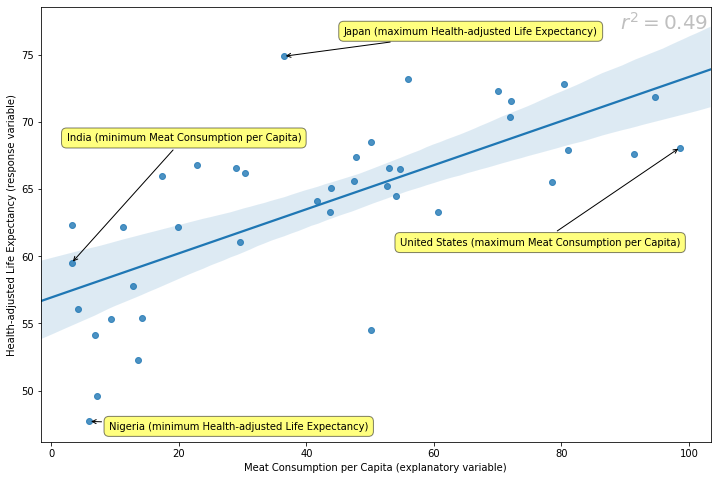

In [35]:

ev_min_xytext = (-5, 120)
ev_max_xytext = (-280, -100)
rv_min_xytext = (20, -10)
rv_max_xytext = (60, 20)
us_xytext = (-70, 30)
columns_list = [ev_column_name, rv_column_name]
show_linear_scatterplot(columns_list)